In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv(r"F:\EDA_MOBILES\Mobiles_Cleaned_data.csv")
df = pd.DataFrame(file)
df.head()

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera
0,NaN,1000.0,NaN,NaN,46.0,NaN,1.8,NaN,Amaq,Q2,0
1,NaN,NaN,64.0,NaN,19.0,64,6.1,NaN,Apple,Iphone 12,12
2,64.0,NaN,64.0,NaN,19.0,4.6,6.1,NaN,Apple,Iphone 12,12
3,12.0,NaN,128.0,NaN,18.0,4.6,6.1,NaN,Apple,Iphone 12,12
4,12.0,NaN,128.0,NaN,11.0,4.6,6.1,NaN,Apple,Iphone 13,12


### finding rows and columns

In [12]:
df.shape

(698, 11)

### Checking duplicates

In [3]:
df.duplicated().sum()

0

### checking null values

In [4]:
df.isna().sum()

RAM               352
Battery            81
Storage           232
Prices            347
Offers             14
Ratings           234
Screen_size        12
Reviews           483
Brand               0
Cleaned_Model       0
Cleaned_Camera      0
dtype: int64

In [5]:
df["Reviews"].fillna(0,inplace =True)

In [6]:
df[df["Screen_size"].isna()]

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera
147,NaN,1000.0,NaN,NaN,14.0,NaN,NaN,0,Itel,Super Guru 4g | King Media | Youtube | Upi,0
309,NaN,NaN,NaN,NaN,44.0,NaN,NaN,0,Nokia,105 Ds 2020,800
320,32.0,1450.0,NaN,NaN,24.0,NaN,NaN,0,Nokia,110 4g Dual Sim Keypad Mobile Wireless Fm Radi...,0
333,NaN,1450.0,125.0,NaN,17.0,NaN,NaN,0,Nokia,2660 Flip 4g Volte Black Keypad Mobile With Du...,0
334,NaN,1450.0,125.0,NaN,15.0,NaN,NaN,0,Nokia,2660 Flip 4g Volte Red Keypad Mobile With Dual...,0
335,0.0,1450.0,125.0,NaN,15.0,NaN,NaN,0,Nokia,2660 Flip 4g Volte Red Keypad Mobile With Dual...,0
621,NaN,NaN,NaN,NaN,36.0,NaN,NaN,117,Samsung,Gt 1200 R/i/m,1
628,51.0,1000.0,NaN,NaN,43.0,NaN,NaN,161,Samsung,Metro 313,0
630,NaN,1000.0,NaN,NaN,32.0,NaN,NaN,0,Samsung,Metro 313,0
634,NaN,1000.0,NaN,NaN,36.0,NaN,NaN,0,Samsung,Metro 313,0


In [7]:
df["Screen_size"].fillna(1.5,inplace = True)

In [8]:
df["Battery"].isna().sum()

81

In [9]:
def fill_battery(row):
    if pd.isna(row['Battery']):
        if row['Cleaned_Model'] == 'Iphone 12':
            return 2815
        elif row['Cleaned_Model'] == 'Iphone 13':
            return 3227
        elif row['Cleaned_Model'] == 'Iphone 14':
            return 3279
        elif row['Cleaned_Model'] == 'Iphone 15':
            return 3349
            
        elif row["Cleaned_Model"] == 'Iphone 14 Plus':
            
            return 3279
        elif row["Cleaned_Model"] == 'Iphone 15 Plus':
            return 3349
            
            
    return row['Battery']

# Apply the function to update the Battery column
df['Battery'] = df.apply(fill_battery, axis=1)

In [10]:
df["Battery"].isna().sum()

59

In [12]:
df["Battery"].fillna(1200,inplace = True)

In [13]:
df["Battery"].isna().sum()
    

0

In [ ]:
#df[df["Battery"].isna()]

In [14]:
rows_to_drop = [8, 9, 10, 11]
df.drop(rows_to_drop,errors = "ignore",inplace = True)

In [15]:
df.isna().sum()

RAM               350
Battery             0
Storage           232
Prices            347
Offers             14
Ratings           234
Screen_size         0
Reviews             0
Brand               0
Cleaned_Model       0
Cleaned_Camera      0
dtype: int64

In [16]:
df["Offers"].fillna(0,inplace = True)

In [ ]:
#df[df["RAM"].isna()].head(50)

In [18]:
def fill_ram(row):
    if pd.isna(row['RAM']):
        if row['Cleaned_Model'] == 'Iphone 12':
            return 6
        elif row['Cleaned_Model'] == 'Iphone 13':
            return 6
        elif row['Cleaned_Model'] == 'Iphone 14':
            return 6
        elif row['Cleaned_Model'] == 'Iphone 15':
            return 6
            
        elif row["Cleaned_Model"] == 'Iphone 14 Plus':
            
            return 8
        elif row["Cleaned_Model"] == 'Iphone 15 Plus':
            return 8
            
            
    return row['RAM']

# Apply the function to update the ram column
df['RAM'] = df.apply(fill_ram, axis=1)

In [19]:
df.loc[(df['Brand'] == 'Tecno') & (df['RAM'].isna()), 'RAM'] = 8
df.loc[(df['Brand'] == 'Vivo') & (df['RAM'].isna()), 'RAM'] = 12
df.loc[(df['Brand'] == 'Xiaomi') & (df['RAM'].isna()), 'RAM'] = 8
df.loc[(df['Brand'] == 'Uismart') & (df['RAM'].isna()), 'RAM'] = 0
df.loc[(df['Brand'] == 'Itel') & (df['RAM'].isna()), 'RAM'] = 0
df.loc[(df['Brand'] == 'Iqoo') & (df['RAM'].isna()), 'RAM'] = 8
df.loc[(df['Brand'] == "Infinix") & (df["RAM"].isna()), 'RAM'] = 8
df.loc[(df['Brand'] == "Honor") & (df["RAM"].isna()), 'RAM'] = 12
df.loc[(df['Brand'] == "Google") & (df["RAM"].isna()), 'RAM'] = 12
df.loc[(df['Brand'] == "Kechaoda") & (df["RAM"].isna()), 'RAM'] = 0
df.loc[(df['Brand'] == "Lava") & (df["RAM"].isna()), 'RAM'] = 0
df.loc[(df['Brand'] == "Karbonn") & (df["RAM"].isna()), 'RAM'] = 0
df.loc[(df['Brand'] == "Nokia") & (df["RAM"].isna()), 'RAM'] = 0
df.loc[(df['Brand'] == "Motorola") & (df["RAM"].isna()), 'RAM'] = 12
df.loc[(df['Brand'] == "Micromax") & (df["RAM"].isna()), 'RAM'] = 0
df.loc[(df['Brand'] == "Poco") & (df["RAM"].isna()), 'RAM'] = 12
df.loc[(df['Brand'] == "Oppo") & (df["RAM"].isna()), 'RAM'] = 6
df.loc[(df['Brand'] == "Oneplus") & (df["RAM"].isna()), 'RAM'] = 8
df.loc[(df['Brand'] == "Nothing") & (df["RAM"].isna()), 'RAM'] = 8
df.loc[(df['Brand'] == "Redmi") & (df["RAM"].isna()), 'RAM'] = 4
df.loc[(df['Brand'] == "Realme") & (df["RAM"].isna()), 'RAM'] = 12
df.loc[(df['Brand'] == "Samsung") & (df["RAM"].isna()), 'RAM'] = 8

In [20]:
df["RAM"].fillna(0,inplace = True)

In [21]:
df.isna().sum()

RAM                 0
Battery             0
Storage           232
Prices            347
Offers              0
Ratings           234
Screen_size         0
Reviews             0
Brand               0
Cleaned_Model       0
Cleaned_Camera      0
dtype: int64

In [22]:
df.loc[(df["Brand"] == "Itel") & (df["Ratings"].isna()),"Ratings"] = 4.0
df.loc[(df["Brand"] == "Kechaoda") & (df["Ratings"].isna()),"Ratings"] = 4.3
df.loc[(df["Brand"] == "Karbonn") & (df["Ratings"].isna()),"Ratings"] = 4.2
df.loc[(df["Brand"] == "Jio") & (df["Ratings"].isna()),"Ratings"] = 4.5
df.loc[(df["Brand"] == "Micromax") & (df["Ratings"].isna()),"Ratings"] = 4.5
df.loc[(df["Brand"] == "Lvix") & (df["Ratings"].isna()),"Ratings"] = 4.4
df.loc[(df["Brand"] == "Lava") & (df["Ratings"].isna()),"Ratings"] = 4.3
df.loc[(df["Brand"] == "Nokia") & (df["Ratings"].isna()),"Ratings"] = 4.5

In [23]:
df["Ratings"].fillna(4.3,inplace = True)

### TYPE CASTING

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 697
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RAM             694 non-null    float64
 1   Battery         694 non-null    float64
 2   Storage         462 non-null    float64
 3   Prices          347 non-null    object 
 4   Offers          694 non-null    float64
 5   Ratings         694 non-null    object 
 6   Screen_size     694 non-null    object 
 7   Reviews         694 non-null    object 
 8   Brand           694 non-null    object 
 9   Cleaned_Model   694 non-null    object 
 10  Cleaned_Camera  694 non-null    object 
dtypes: float64(4), object(7)
memory usage: 65.1+ KB


In [25]:
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Ratings'] = df['Ratings'].astype(float)

In [26]:
df[df["Ratings"] >=4.6]

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera
1,6.0,2815.0,64.0,NaN,19.0,64.0,6.1,0,Apple,Iphone 12,12
2,64.0,2815.0,64.0,NaN,19.0,4.6,6.1,0,Apple,Iphone 12,12
3,12.0,2815.0,128.0,NaN,18.0,4.6,6.1,0,Apple,Iphone 12,12
4,12.0,3227.0,128.0,NaN,11.0,4.6,6.1,0,Apple,Iphone 13,12
5,25.0,3227.0,256.0,NaN,14.0,4.6,6.1,0,Apple,Iphone 13,12
...,...,...,...,...,...,...,...,...,...,...,...
580,6.0,5000.0,128.0,"19,999",10.0,4.8,6.5,0,Samsung,Galaxy A15 5g,50
618,8.0,5000.0,256.0,NaN,93.0,12.0,6.8,0,Samsung,Galaxy S24 Ultra 5g,200
619,12.0,5000.0,256.0,NaN,93.0,4.6,6.8,223,Samsung,Galaxy S24 Ultra 5g,200
656,8.0,6000.0,256.0,NaN,12.0,12.0,6.78,0,Tecno,Pova 6 Pro,108


### REMOVING OUTLIERS

In [27]:
from scipy.stats import zscore

In [28]:
df['Ratings'] = df['Ratings'].apply(lambda x: 4.5 if x > 4.6 else x)


In [29]:
mean_rating = df['Ratings'].mean()
df['Ratings'] = df['Ratings'].fillna(mean_rating)

In [30]:
df['z_score'] = zscore(df['Ratings'])

In [31]:
df.drop(columns = "z_score",inplace = True)

In [32]:
df.isna().sum()

RAM                 0
Battery             0
Storage           232
Prices            347
Offers              0
Ratings             0
Screen_size         0
Reviews             0
Brand               0
Cleaned_Model       0
Cleaned_Camera      0
dtype: int64

In [33]:
df["Storage"].fillna(32,inplace = True)

In [34]:
df.loc[(df["Cleaned_Model"] == "Iphone 12") & (df["Prices"].isna()),"Prices"] = 49999
df.loc[(df["Cleaned_Model"] == "Iphone 13") & (df["Prices"].isna()),"Prices"] = 54000
df.loc[(df["Cleaned_Model"] == "Pixel 7") & (df["Prices"].isna()),"Prices"] = 45000
df.loc[(df["Cleaned_Model"] == "Pixel 7a") & (df["Prices"].isna()),"Prices"] = 50000
df.loc[(df["Cleaned_Model"] == "Pixel 8") & (df["Prices"].isna()),"Prices"] = 52000
df.loc[(df["Cleaned_Model"] == "Pixel 8a") & (df["Prices"].isna()),"Prices"] = 55000
df.loc[(df["Cleaned_Model"] == "Gt 20 Pro") & (df["Prices"].isna()),"Prices"] = 23999
df.loc[(df["Cleaned_Model"] == "Neo9 Pro") & (df["Prices"].isna()),"Prices"] = 25000
df.loc[(df["Cleaned_Model"] == "Z9") & (df["Prices"].isna()),"Prices"] = 20000
df.loc[(df["Cleaned_Model"] == "Z9x") & (df["Prices"].isna()),"Prices"] = 23000
df.loc[(df["Cleaned_Model"] == "Z9 5g") & (df["Prices"].isna()),"Prices"] = 22500
df.loc[(df["Cleaned_Model"] == "A05s") & (df["Prices"].isna()),"Prices"] = 11000


In [35]:
df.loc[(df["Cleaned_Model"] == "Note 13 5g") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 18000
df.loc[(df["Cleaned_Model"] == "Note 13 5g") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 22000
df.loc[(df["Cleaned_Model"] == "Galaxy F12") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 22500
df.loc[(df["Cleaned_Model"] == "Galaxy M14 5g") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 31000
df.loc[(df["Cleaned_Model"] == "Pova 6 Pro") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 19999
df.loc[(df["Cleaned_Model"] == "Pova 6 Pro 5g") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 23000
df.loc[(df["Cleaned_Model"] == "Spark 20") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 11000
df.loc[(df["Cleaned_Model"] == "Galaxy S24 Ultra 5g") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 129999
df.loc[(df["Cleaned_Model"] == "10 Power") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 15000
df.loc[(df["Cleaned_Model"] == "Narzo N65 5g") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 13000
df.loc[(df["Cleaned_Model"] == "13c") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 18000
df.loc[(df["Cleaned_Model"] == "13c") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 20000
df.loc[(df["Cleaned_Model"] == "13c 5g") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 11999
df.loc[(df["Cleaned_Model"] == "13c 5g") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 10999
df.loc[(df["Cleaned_Model"] == "7a") & (df["Storage"] ==32.0) & (df["Prices"].isna()),"Prices"] = 7999
df.loc[(df["Cleaned_Model"] == "12r") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 36499
df.loc[(df["Cleaned_Model"] == "12r") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 40727
#df.loc[(df["Cleaned_Model"] == "12r") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 40725
df.loc[(df["Cleaned_Model"] == "Nord Ce 2 Lite 5g") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 16763
df.loc[(df["Cleaned_Model"] == "Nord Ce4") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 24328
df.loc[(df["Cleaned_Model"] == "Nord Ce4") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 26777
df.loc[(df["Cleaned_Model"] == "Gt 6t 5g") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 29483
df.loc[(df["Cleaned_Model"] == "Gt 6t 5g") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 30658
df.loc[(df["Cleaned_Model"] == "Gt 6t 5g") & (df["Storage"] ==512.0) & (df["Prices"].isna()),"Prices"] = 38999
df.loc[(df["Cleaned_Model"] == "Narzo 60x 5g") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 14586
df.loc[(df["Cleaned_Model"] == "Galaxy S24 5g") & (df["Storage"] ==256.0) & (df["Prices"].isna()),"Prices"] = 12999
df.loc[(df["Cleaned_Model"] == "C32") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 7990
df.loc[(df["Cleaned_Model"] == "C22") & (df["Storage"] ==64.0) & (df["Prices"].isna()),"Prices"] = 5999
df.loc[(df["Cleaned_Model"] == "Phone") & (df["Storage"] ==128.0) & (df["Prices"].isna()),"Prices"] = 32499
df.loc[(df["Cleaned_Model"] == "Phone") & (df["Storage"] == 512.0) & (df["Prices"].isna()),"Prices"] = 35999
df.loc[(df["Cleaned_Model"] == "Phone 5g") & (df["Storage"] == 128.0) & (df["Prices"].isna()),"Prices"] = 33000
df.loc[(df["Cleaned_Model"] == "Phone 5g") & (df["Storage"] == 512.0) & (df["Prices"].isna()),"Prices"] = 38999
df.loc[(df["Cleaned_Model"] == "Phone 5g") & (df["Storage"] == 256.0) & (df["Prices"].isna()),"Prices"] = 36000
df.loc[(df["Cleaned_Model"] == "12") & (df["Storage"] == 256.0) & (df["Prices"].isna()),"Prices"] = 59990
df.loc[(df["Cleaned_Model"] == "12") & (df["Storage"] == 512.0) & (df["Prices"].isna()),"Prices"] =65000
df.loc[(df["Cleaned_Model"] == "11r 5g") & (df["Storage"] == 256.0) & (df["Prices"].isna()),"Prices"] = 34899
df.loc[(df["Cleaned_Model"] == "A70") & (df["Storage"] == 256.0) & (df["Prices"].isna()),"Prices"] = 7469


In [36]:
df["Prices"].fillna(1500,inplace = True)

In [37]:
df.isna().sum()

RAM               0
Battery           0
Storage           0
Prices            0
Offers            0
Ratings           0
Screen_size       0
Reviews           0
Brand             0
Cleaned_Model     0
Cleaned_Camera    0
dtype: int64

In [38]:
df.head()

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera
0,0.0,1000.0,32.0,1500,46.0,4.3,1.8,0,Amaq,Q2,0
1,6.0,2815.0,64.0,49999,19.0,4.5,6.1,0,Apple,Iphone 12,12
2,64.0,2815.0,64.0,49999,19.0,4.6,6.1,0,Apple,Iphone 12,12
3,12.0,2815.0,128.0,49999,18.0,4.6,6.1,0,Apple,Iphone 12,12
4,12.0,3227.0,128.0,54000,11.0,4.6,6.1,0,Apple,Iphone 13,12


### Type Casting

In [39]:
df['Cleaned_Camera'] = pd.to_numeric(df['Cleaned_Camera'], errors='coerce')
df['Cleaned_Camera'] = df['Cleaned_Camera'].astype(float)

In [40]:
df['Cleaned_Camera'] = df['Cleaned_Camera'].apply(lambda x: 0 if x > 200 else x)
mean_rating = df["Cleaned_Camera"].mean()
df['Cleaned_Camera'] = df['Cleaned_Camera'].fillna(mean_rating)
df['z_score'] = zscore(df["Cleaned_Camera"])


In [41]:
df.drop(columns = "z_score",inplace = True)

In [42]:
df['Screen_size'] = pd.to_numeric(df["Screen_size"], errors='coerce')
df['Screen_size'] = df['Screen_size'].astype(float)

In [43]:
df["Screen_size"] = df['Screen_size'].apply(lambda x: 1.77 if x > 6.9 else x)
mean_rating = df["Screen_size"].mean()
df['Screen_size'] = df['Screen_size'].fillna(mean_rating)
df['z_score'] = zscore(df["Screen_size"])
df.drop(columns = "z_score",inplace = True)

In [44]:
df[df["Screen_size"] > 6.9]

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera


In [45]:
df[df["Storage"] > 512.0]

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera


In [46]:
df.loc[df['Cleaned_Model'] == 'Iphone 12', 'RAM'] = 6
df.loc[df['Cleaned_Model'] == 'Iphone 13', 'RAM'] = 6
df.loc[df['Cleaned_Model'] == "Iphone 14 Plus", 'RAM'] = 8
df.loc[df['Cleaned_Model'] == "Iphone 15", 'RAM'] = 8

In [47]:
df["RAM"] = df['RAM'].apply(lambda x: 0 if x > 12.0 else x)
mean_rating = df["RAM"].mean()
df['RAM'] = df['RAM'].fillna(mean_rating)
df['z_score'] = zscore(df["RAM"])
df.drop(columns = "z_score",inplace = True)

In [48]:
df[df["RAM"] > 12.0]

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera


### Univarient Analysis

In [49]:
df.shape

(694, 11)

In [50]:
df.duplicated().sum()

19

In [51]:
df.drop_duplicates(inplace = True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 697
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RAM             675 non-null    float64
 1   Battery         675 non-null    float64
 2   Storage         675 non-null    float64
 3   Prices          675 non-null    object 
 4   Offers          675 non-null    float64
 5   Ratings         675 non-null    float64
 6   Screen_size     675 non-null    float64
 7   Reviews         675 non-null    object 
 8   Brand           675 non-null    object 
 9   Cleaned_Model   675 non-null    object 
 10  Cleaned_Camera  675 non-null    float64
dtypes: float64(7), object(4)
memory usage: 63.3+ KB


In [53]:
df[df["Prices"].isna()]

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Reviews,Brand,Cleaned_Model,Cleaned_Camera


In [54]:
df['Prices'] = df['Prices'].astype(str)

df['Prices'] = df['Prices'].str.replace(',', '')                        
df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')
df['Prices'].fillna(1500, inplace=True)
df['Prices'] = df['Prices'].astype(int)

In [55]:
df['Reviews'] = df['Reviews'].astype(str)

df['Reviews'] = df['Reviews'].str.replace(',', '')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews'].fillna(0, inplace=True)
df["Reviews"] = df['Reviews'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 697
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RAM             675 non-null    float64
 1   Battery         675 non-null    float64
 2   Storage         675 non-null    float64
 3   Prices          675 non-null    int32  
 4   Offers          675 non-null    float64
 5   Ratings         675 non-null    float64
 6   Screen_size     675 non-null    float64
 7   Reviews         675 non-null    int32  
 8   Brand           675 non-null    object 
 9   Cleaned_Model   675 non-null    object 
 10  Cleaned_Camera  675 non-null    float64
dtypes: float64(7), int32(2), object(2)
memory usage: 58.0+ KB


In [57]:
df.drop(columns = "Reviews",inplace = True)

In [58]:
df.head()

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Brand,Cleaned_Model,Cleaned_Camera
0,0.0,1000.0,32.0,1500,46.0,4.3,1.8,Amaq,Q2,0.0
1,6.0,2815.0,64.0,49999,19.0,4.5,6.1,Apple,Iphone 12,12.0
2,6.0,2815.0,64.0,49999,19.0,4.6,6.1,Apple,Iphone 12,12.0
3,6.0,2815.0,128.0,49999,18.0,4.6,6.1,Apple,Iphone 12,12.0
4,6.0,3227.0,128.0,54000,11.0,4.6,6.1,Apple,Iphone 13,12.0


In [59]:
df.describe()

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Cleaned_Camera
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,5.100741,3745.582222,118.737778,21226.413333,29.762963,4.320192,5.001990,37.317983
std,4.294629,1828.102511,95.726773,24880.550561,20.184758,0.131249,2.276686,41.695196
min,0.000000,300.000000,0.000000,1500.000000,0.000000,3.900000,0.660000,0.000000
25%,0.000000,1450.000000,32.000000,1500.000000,17.000000,4.300000,2.215000,0.000000
50%,4.000000,5000.000000,128.000000,14999.000000,25.000000,4.319262,6.580000,50.000000
75%,8.000000,5000.000000,128.000000,26999.000000,35.000000,4.400000,6.700000,50.000000
max,12.000000,6000.000000,512.000000,129999.000000,99.000000,4.600000,6.820000,200.000000


In [60]:
df.nunique()              

RAM                 8
Battery            47
Storage            11
Prices            115
Offers             57
Ratings             9
Screen_size        41
Brand              39
Cleaned_Model     285
Cleaned_Camera     15
dtype: int64

In [61]:
brand_counts = df['Brand'].value_counts()
print(brand_counts)

Brand
Redmi         87
Realme        67
Itel          62
Samsung       61
Kechaoda      46
Nokia         43
Poco          34
Lava          34
Motorola      29
Vivo          25
Oneplus       24
Apple         22
Infinix       21
Tecno         15
Karbonn       13
Oppo          12
Micromax      12
Iqoo          11
Google         8
Nothing        7
Snexian        5
I              4
Honor          4
Lvix           3
Iair           3
Jio            3
Saregama       2
Tara           2
Uismart        2
Xiaomi         2
Mtr            2
Gfive          2
Blackzone      2
Siavantage     1
Globalone      1
Dizo           1
Cellecor       1
Vox            1
Amaq           1
Name: count, dtype: int64


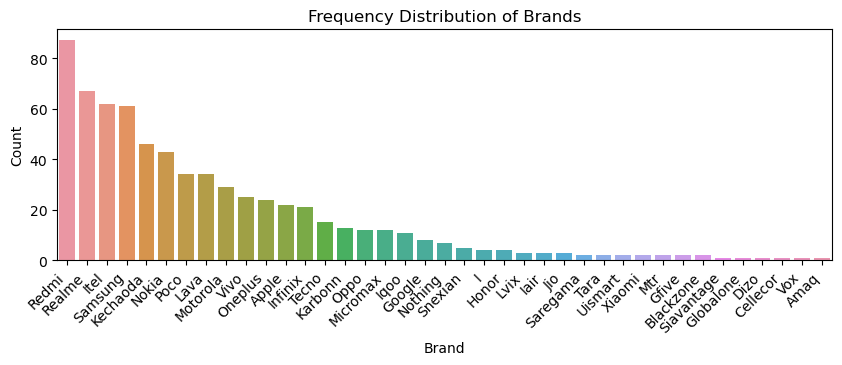

In [62]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='Brand', order=brand_counts.index)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

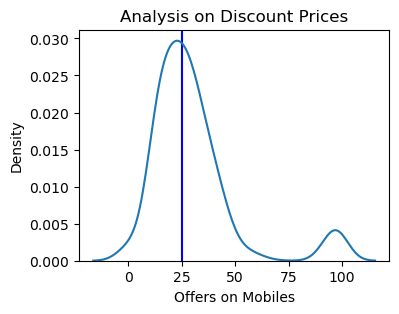

In [63]:
plt.figure(figsize=(4,3))
plt.axvline(df["Offers"].median(),color = "blue")
sns.kdeplot(data = df, x ="Offers")
plt.xlabel("Offers on Mobiles")
plt.title("Analysis on Discount Prices")
plt.show()

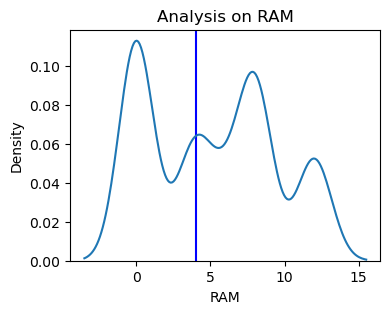

In [64]:
plt.figure(figsize=(4,3))
plt.axvline(df["RAM"].median(),color = "blue")
sns.kdeplot(data = df, x ="RAM")
plt.xlabel("RAM")
plt.title("Analysis on RAM")
plt.show()

Text(0.5, 1.0, 'PRICE ANALYSIS')

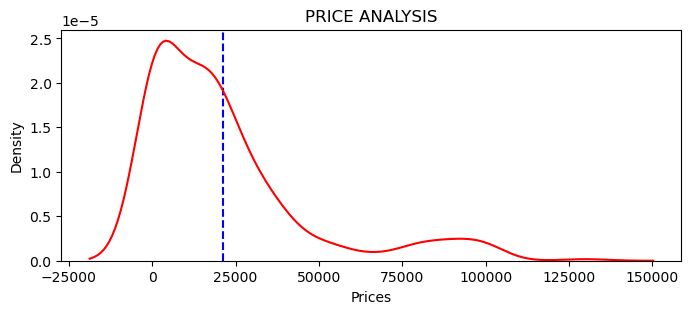

In [65]:
plt.figure(figsize=(8,3))
plt.axvline(df["Prices"].mean(),color = "blue",linestyle = "--")
sns.kdeplot(data = df,x = "Prices",color = "Red")
plt.xlabel("Prices")
plt.ylabel("Density")
plt.title("PRICE ANALYSIS")

In [66]:
df[df["Storage"]>500]

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Brand,Cleaned_Model,Cleaned_Camera
43,12.0,5000.0,512.0,49999,43.0,4.1,6.70,Honor,90 5g,200.0
346,8.0,4700.0,512.0,35999,35.0,4.5,6.70,Nothing,Phone,50.0
358,8.0,5400.0,512.0,65000,98.0,4.5,6.82,Oneplus,12,64.0
359,8.0,5400.0,512.0,65000,12.0,4.5,6.82,Oneplus,12,64.0
415,12.0,5100.0,512.0,27999,21.0,4.5,6.67,Poco,X6 5g,64.0
421,12.0,5000.0,512.0,32999,21.0,4.3,6.67,Poco,X6 Pro 5g,64.0
449,12.0,5500.0,512.0,38999,99.0,4.6,6.78,Realme,Gt 6t 5g,50.0
450,12.0,5500.0,512.0,38999,97.0,4.6,6.78,Realme,Gt 6t 5g,50.0
572,4.0,5000.0,512.0,37999,97.0,4.5,6.67,Redmi,Note 13 Pro+ 5g,200.0
574,4.0,5000.0,512.0,37999,16.0,4.5,6.67,Redmi,Note 13 Pro+ 5g,200.0


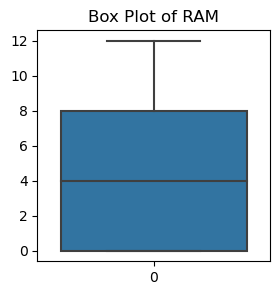

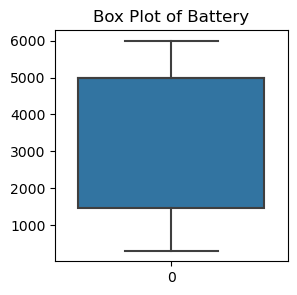

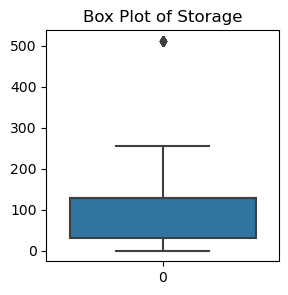

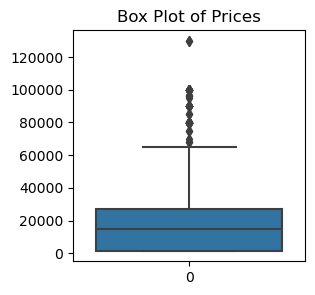

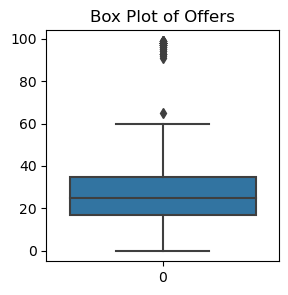

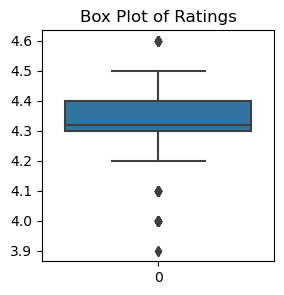

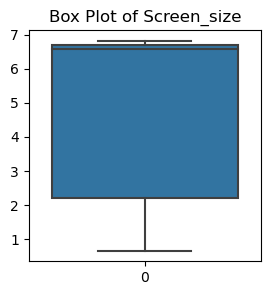

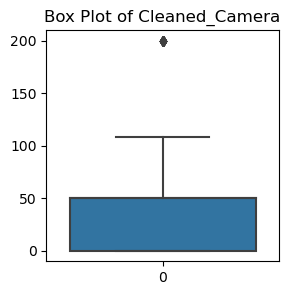

In [67]:
for var in df.describe():
    # Box Plot
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df[var])
    plt.title(f'Box Plot of {var}')
    plt.show()

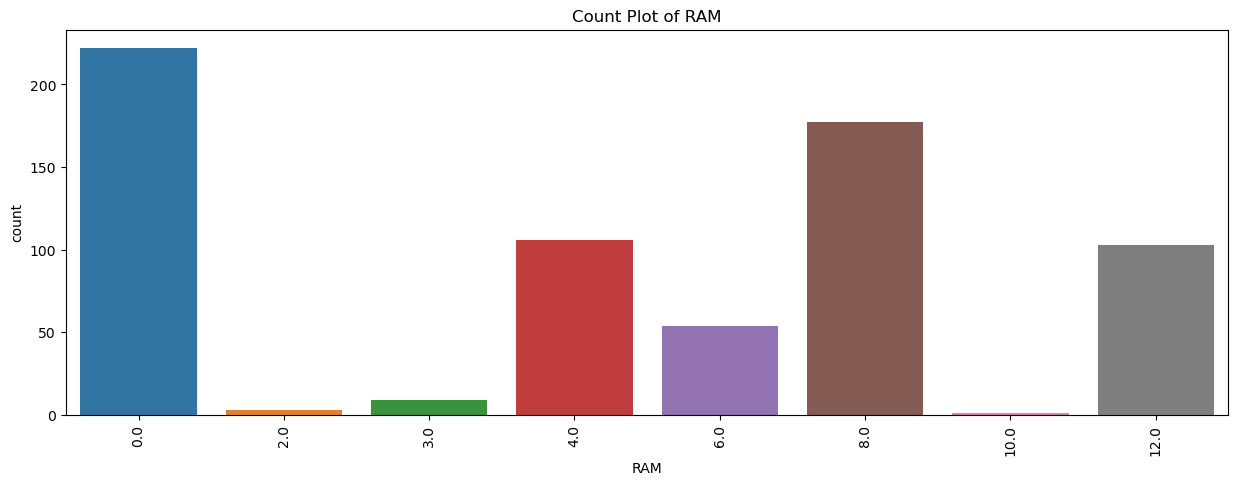

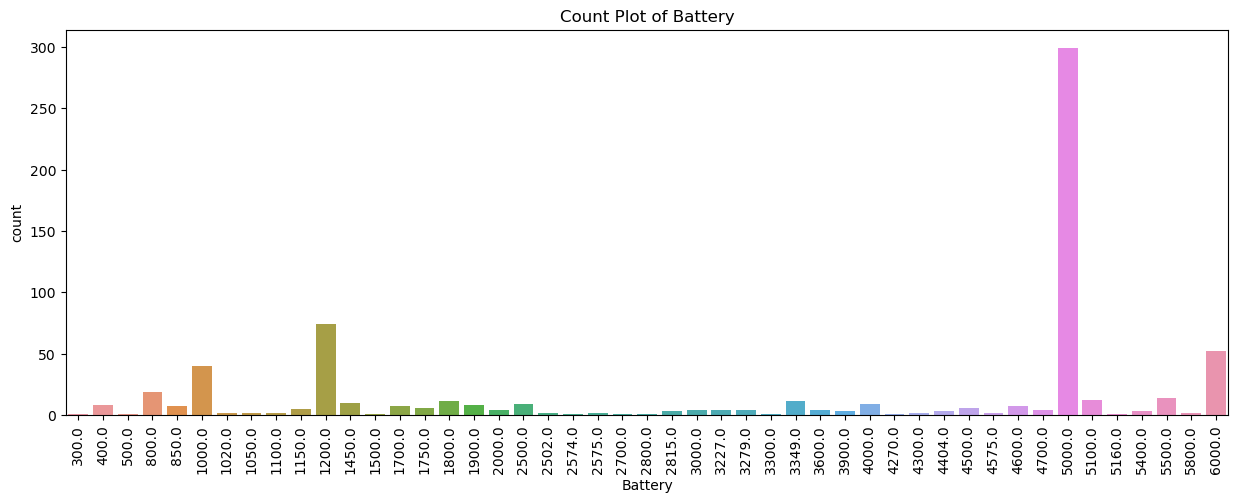

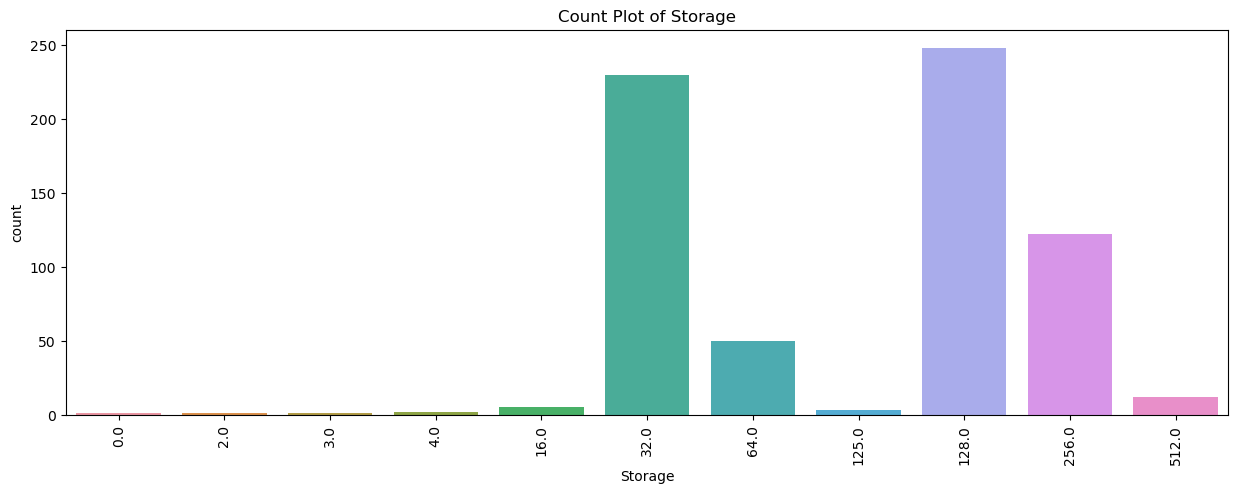

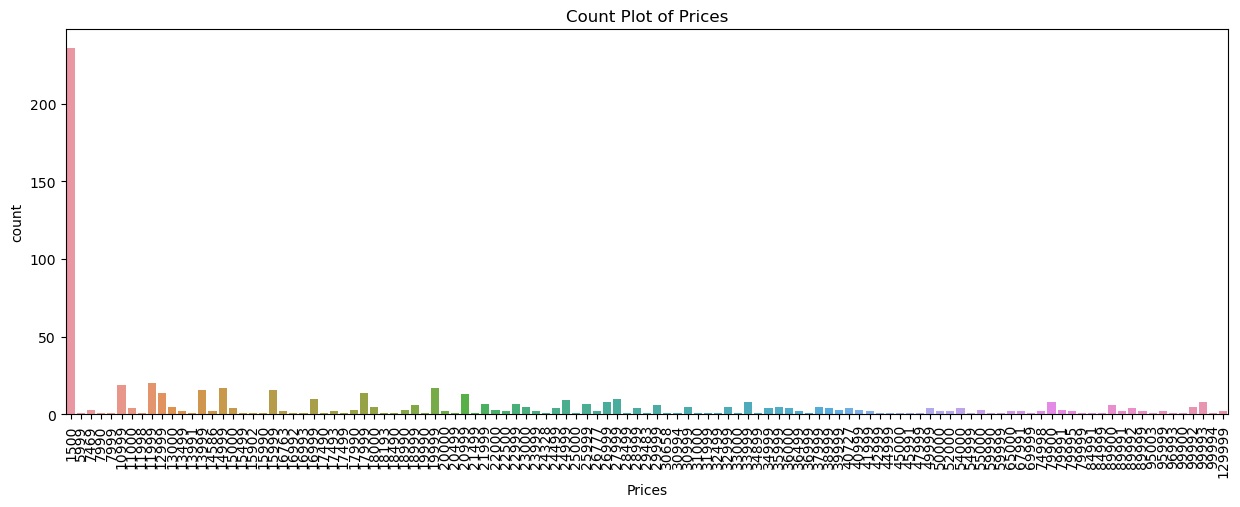

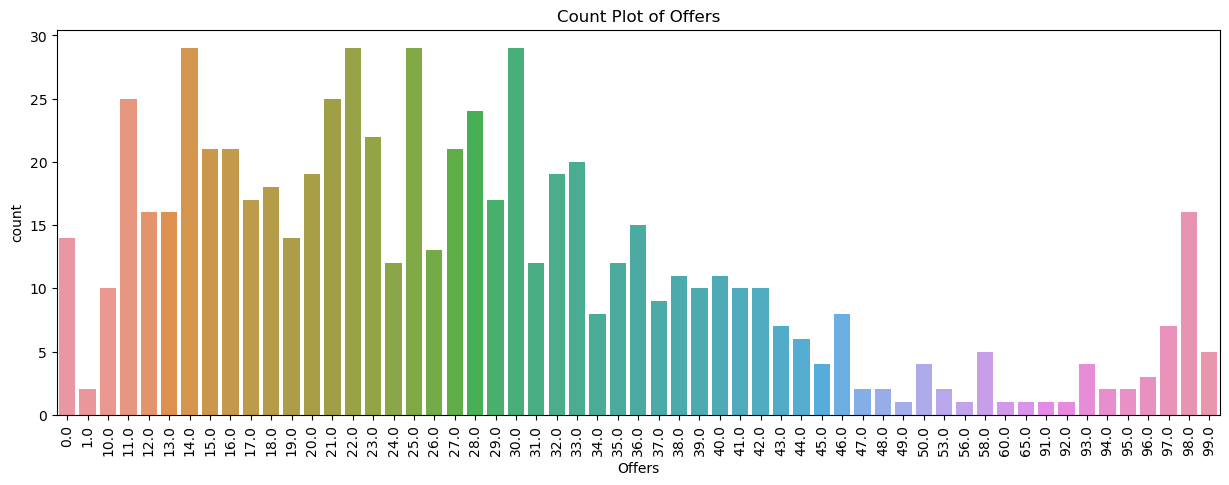

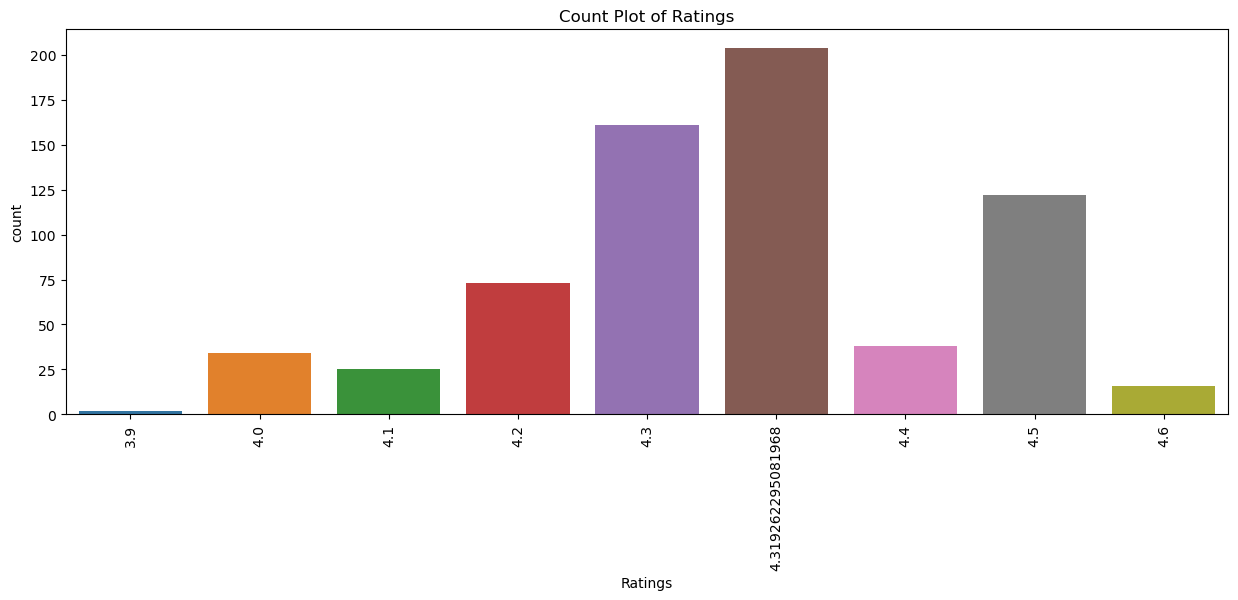

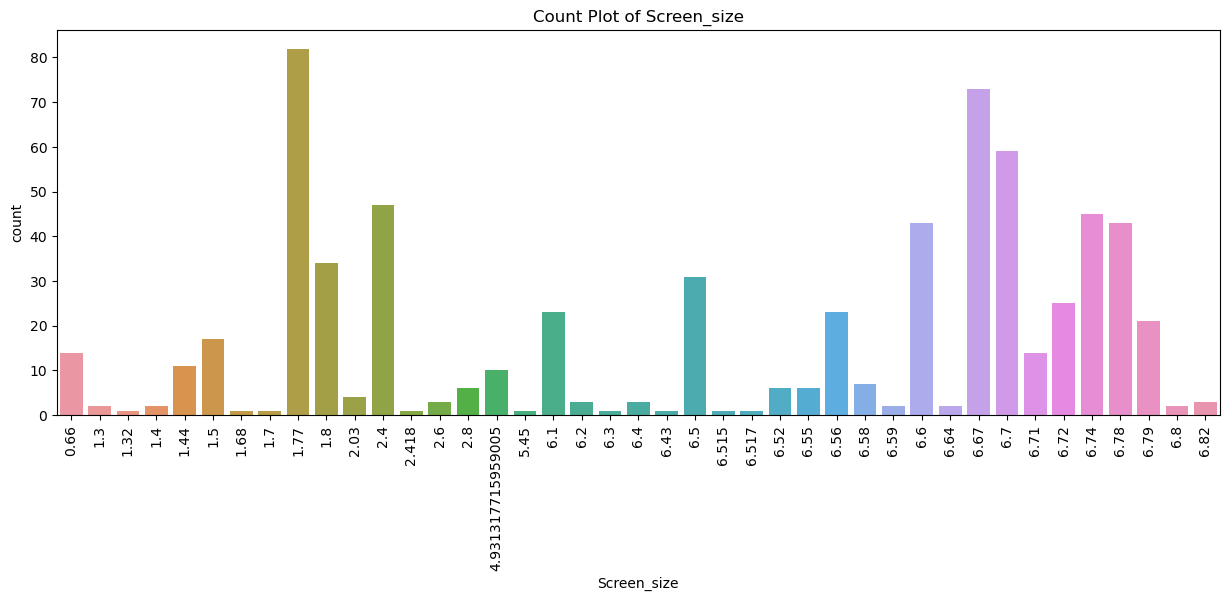

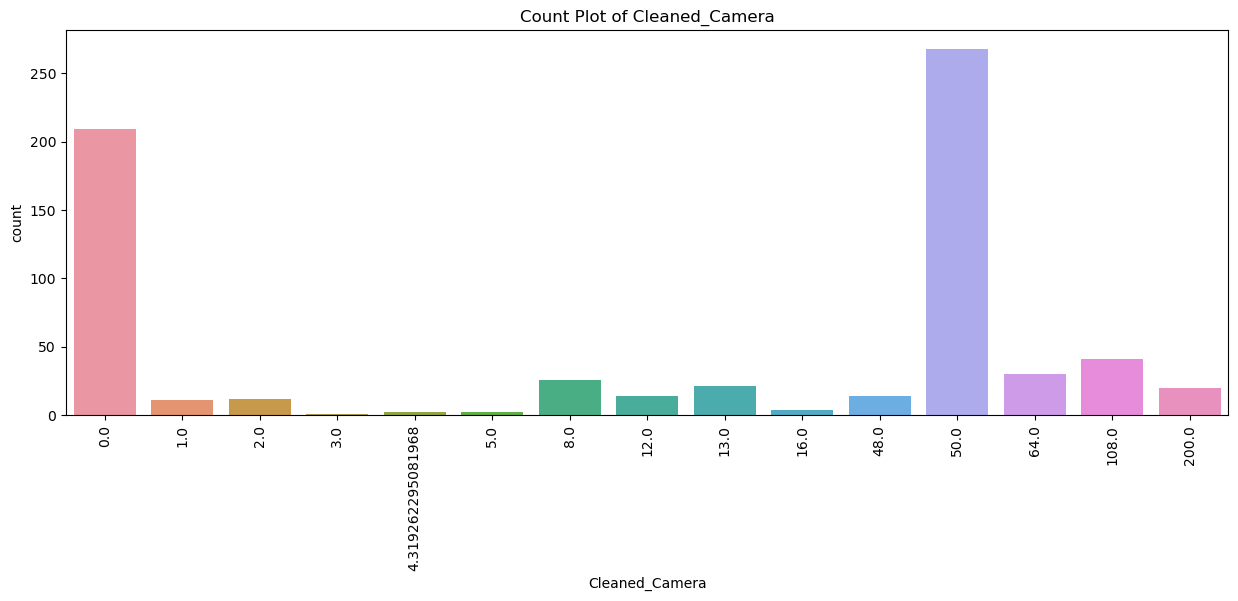

In [68]:
for var in df.select_dtypes(include='number'):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=df, x=var)
    plt.title(f'Count Plot of {var}')

    # Adjust font properties to reduce shadow intensity
    ax.tick_params(axis='x', labelrotation=90, labelcolor='black', labelsize='medium')
    
    plt.show()

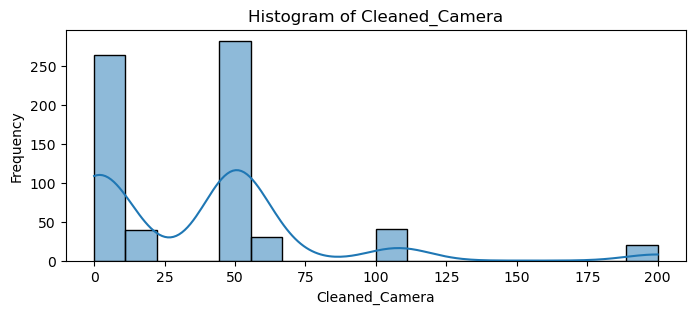

In [69]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df[var], kde=True)
plt.title(f'Histogram of {var}')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.show()

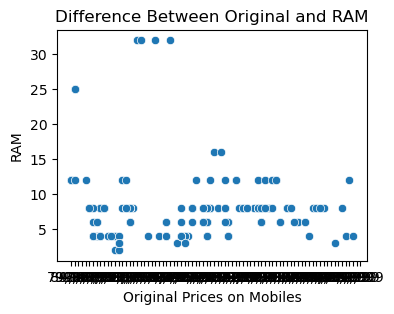

In [19]:
plt.figure(figsize = (4,3))
sns.scatterplot(data = df, x = "Prices" , y = "RAM")
plt.xlabel("Original Prices on Mobiles")
plt.ylabel("RAM")
plt.title("Difference Between Original and RAM")
plt.show()

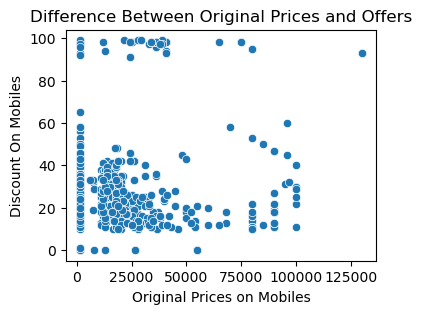

In [71]:
plt.figure(figsize = (4,3))
sns.scatterplot(data = df, x = "Prices" , y = "Offers")
plt.xlabel("Original Prices on Mobiles")
plt.ylabel("Discount On Mobiles")
plt.title("Difference Between Original Prices and Offers")
plt.show()

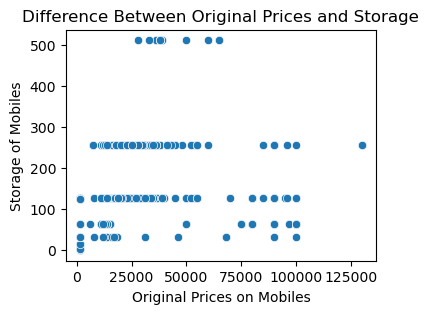

In [72]:
plt.figure(figsize = (4,3))
sns.scatterplot(data = df, x = "Prices" , y = "Storage")
plt.xlabel("Original Prices on Mobiles")
plt.ylabel("Storage of Mobiles")
plt.title("Difference Between Original Prices and Storage")
plt.show()

<Axes: xlabel='Storage', ylabel='Prices'>

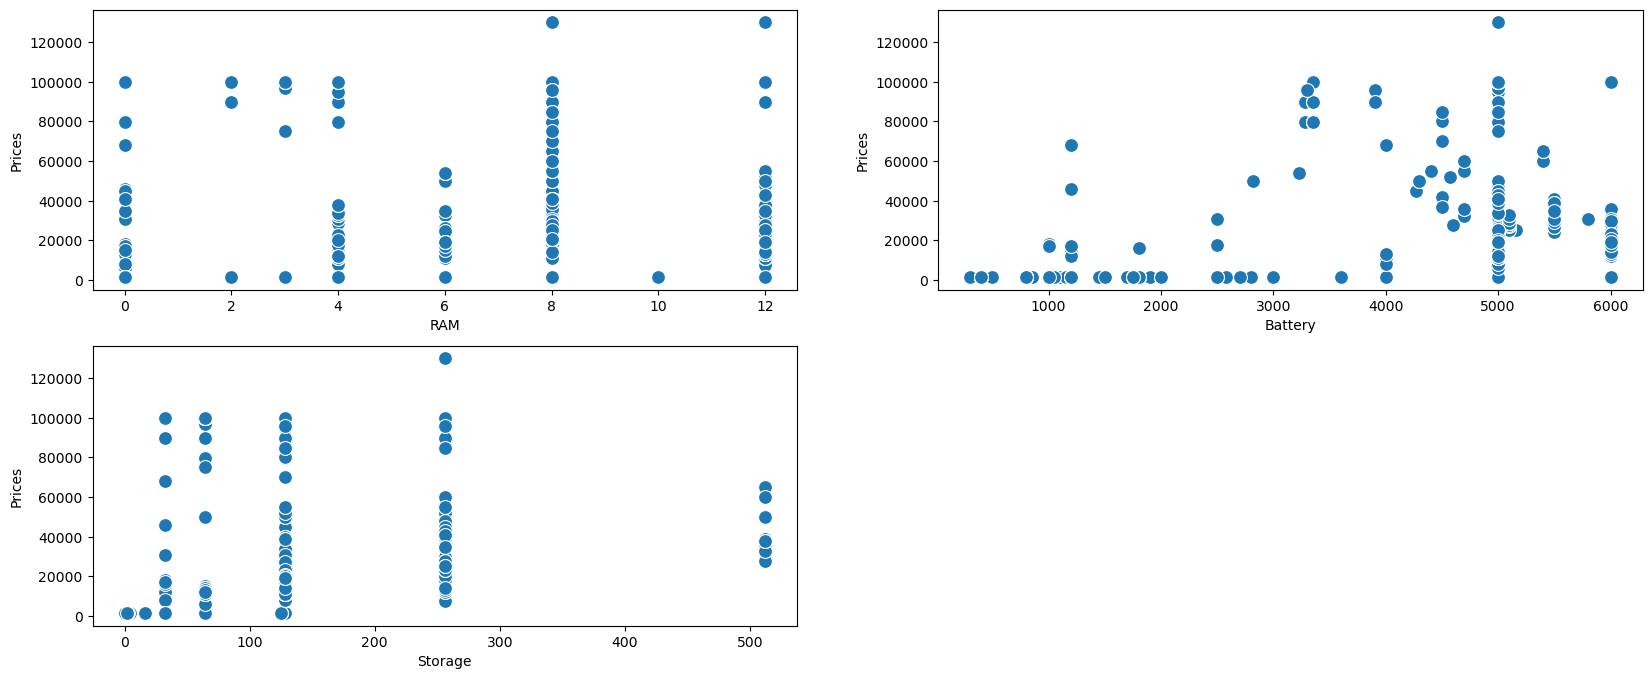

In [73]:
plt.figure(figsize = (20, 8))

plt.subplot(2,2,1)
sns.scatterplot(x ='RAM', y ='Prices', data = df,s = 100)
plt.subplot(2,2,2)
sns.scatterplot(x ='Battery', y ="Prices", data = df,s = 100)
plt.subplot(2,2,3)
sns.scatterplot(x ='Storage', y ='Prices', data = df,s = 100)


In [74]:
df.head()

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Brand,Cleaned_Model,Cleaned_Camera
0,0.0,1000.0,32.0,1500,46.0,4.3,1.8,Amaq,Q2,0.0
1,6.0,2815.0,64.0,49999,19.0,4.5,6.1,Apple,Iphone 12,12.0
2,6.0,2815.0,64.0,49999,19.0,4.6,6.1,Apple,Iphone 12,12.0
3,6.0,2815.0,128.0,49999,18.0,4.6,6.1,Apple,Iphone 12,12.0
4,6.0,3227.0,128.0,54000,11.0,4.6,6.1,Apple,Iphone 13,12.0


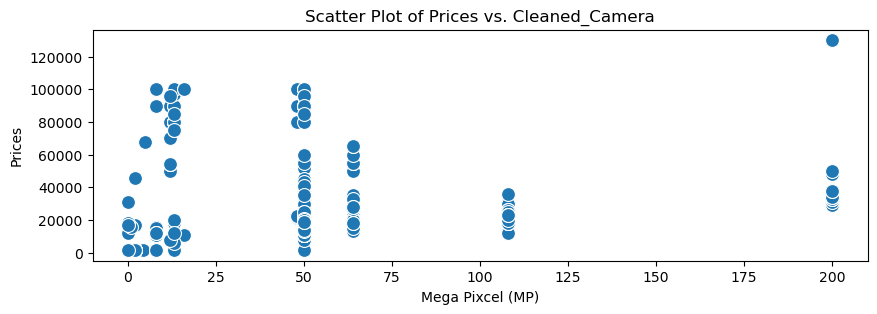

In [75]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x='Cleaned_Camera', y='Prices', s=100)
plt.title('Scatter Plot of Prices vs. Cleaned_Camera')
plt.xlabel('Mega Pixcel (MP)')
plt.ylabel('Prices')
plt.show()

<Axes: xlabel='Screen_size', ylabel='Prices'>

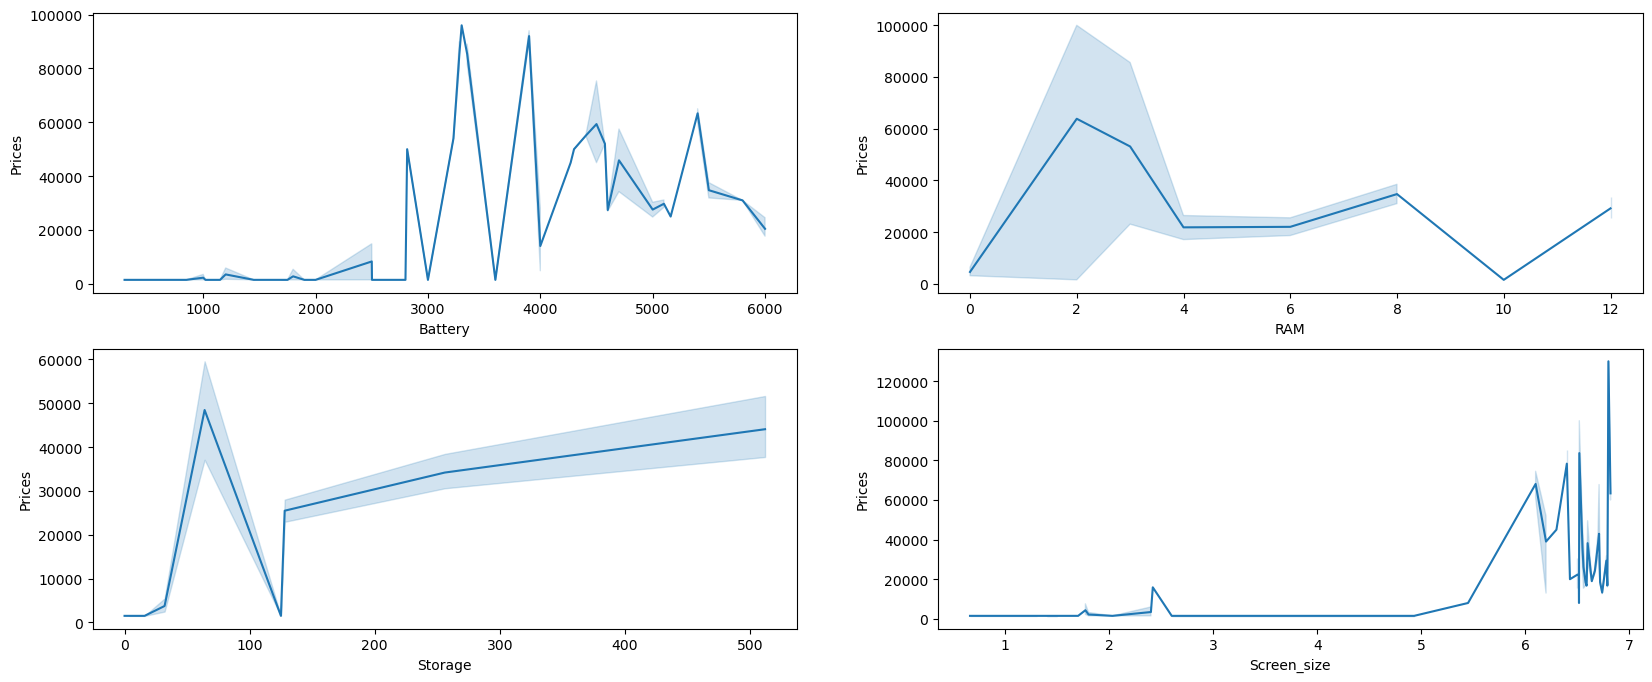

In [76]:
plt.figure(figsize = (20, 8))

plt.subplot(2,2,1)
sns.lineplot(x ='Battery', y ='Prices', data = df)
plt.subplot(2,2,2)
sns.lineplot(x ='RAM', y ='Prices', data = df)
plt.subplot(2,2,3)
sns.lineplot(x ='Storage', y ='Prices', data = df)
plt.subplot(2,2,4)
sns.lineplot(x ='Screen_size', y ='Prices', data = df)

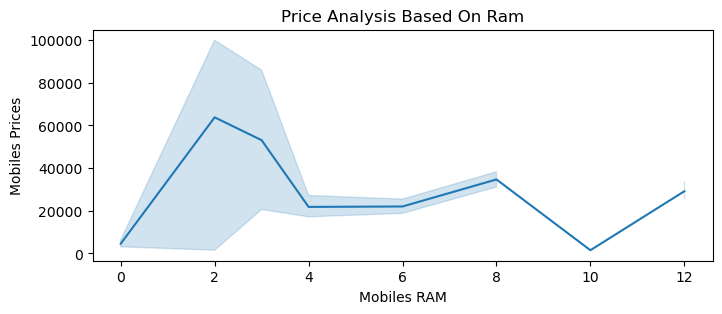

In [77]:
plt.figure(figsize = (8,3))
sns.lineplot(data = df,x = "RAM", y = "Prices")
plt.xlabel("Mobiles RAM")
plt.ylabel("Mobiles Prices")
plt.title("Price Analysis Based On Ram")
plt.show()

In [78]:
df.groupby("Brand")["Prices"].max().head()

Brand
Amaq          1500
Apple        99900
Blackzone     1500
Cellecor      1500
Dizo          1500
Name: Prices, dtype: int32

In [80]:
df.head()

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Brand,Cleaned_Model,Cleaned_Camera
0,0.0,1000.0,32.0,1500,46.0,4.3,1.8,Amaq,Q2,0.0
1,6.0,2815.0,64.0,49999,19.0,4.5,6.1,Apple,Iphone 12,12.0
2,6.0,2815.0,64.0,49999,19.0,4.6,6.1,Apple,Iphone 12,12.0
3,6.0,2815.0,128.0,49999,18.0,4.6,6.1,Apple,Iphone 12,12.0
4,6.0,3227.0,128.0,54000,11.0,4.6,6.1,Apple,Iphone 13,12.0


In [81]:
df.groupby(by=["Brand", "Cleaned_Model"])["Prices"].max().head()

Brand  Cleaned_Model 
Amaq   Q2                 1500
Apple  Iphone 12         49999
       Iphone 13         54000
       Iphone 14 Plus    89900
       Iphone 15         89900
Name: Prices, dtype: int32

In [82]:
correlation = df['Prices'].corr(df['Storage'])
print(f'Correlation between Prices and Storage Capacity: {correlation}')

Correlation between Prices and Storage Capacity: 0.3925438711091353


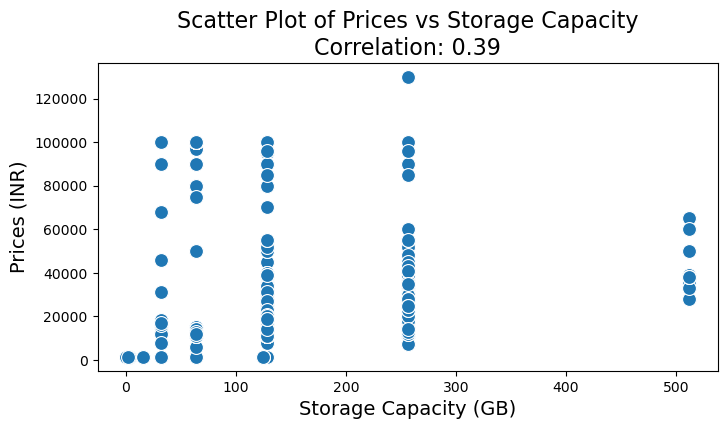

In [83]:
plt.figure(figsize=(8,4))
sns.scatterplot(x ='Storage', y ='Prices', data = df,s = 100)
plt.title(f'Scatter Plot of Prices vs Storage Capacity\nCorrelation: {correlation:.2f}', fontsize=16)
#plt.title("Prices vs Storage Capacity")
plt.xlabel("Storage Capacity (GB)", fontsize=14)
plt.ylabel("Prices (INR)", fontsize=14)
plt.show()

In [84]:
df.groupby('Storage')['Prices'].describe()

,count,mean,std,min,25%,50%,75%,max
Storage,,,,,,,,
0.0,1.0,1500.000000,NaN,1500.0,1500.0,1500.0,1500.0,1500.0
2.0,1.0,1500.000000,NaN,1500.0,1500.0,1500.0,1500.0,1500.0
3.0,1.0,1500.000000,NaN,1500.0,1500.0,1500.0,1500.0,1500.0
4.0,2.0,1500.000000,0.000000,1500.0,1500.0,1500.0,1500.0,1500.0
16.0,5.0,1500.000000,0.000000,1500.0,1500.0,1500.0,1500.0,1500.0
32.0,230.0,3750.030435,11416.122444,1500.0,1500.0,1500.0,1500.0,99994.0
64.0,50.0,48466.340000,40765.058474,1500.0,11999.0,14999.0,89992.0,99993.0
125.0,3.0,1500.000000,0.000000,1500.0,1500.0,1500.0,1500.0,1500.0
128.0,248.0,25490.681452,20415.748763,1500.0,14999.0,18000.0,25999.0,99993.0


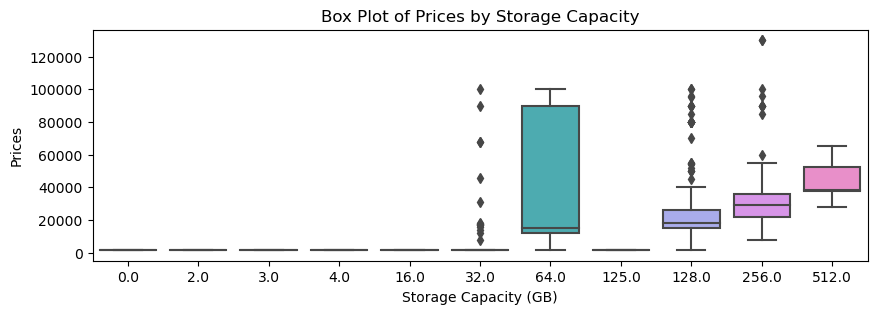

In [85]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='Storage', y='Prices')
plt.title('Box Plot of Prices by Storage Capacity')
plt.xlabel('Storage Capacity (GB)')
plt.ylabel('Prices')
plt.show()

In [86]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix

,RAM,Battery,Storage,Prices,Offers,Ratings,Screen_size,Cleaned_Camera
RAM,1.000000,0.668220,0.597591,0.420641,-0.068974,0.090141,0.701164,0.548116
Battery,0.668220,1.000000,0.625974,0.433410,-0.037243,0.015099,0.901611,0.642127
Storage,0.597591,0.625974,1.000000,0.392544,0.049357,0.187843,0.643484,0.666434
Prices,0.420641,0.433410,0.392544,1.000000,0.045117,0.215499,0.509880,0.312820
Offers,-0.068974,-0.037243,0.049357,0.045117,1.000000,0.010035,-0.065599,0.004500
Ratings,0.090141,0.015099,0.187843,0.215499,0.010035,1.000000,0.050096,0.036895
Screen_size,0.701164,0.901611,0.643484,0.509880,-0.065599,0.050096,1.000000,0.640380
Cleaned_Camera,0.548116,0.642127,0.666434,0.312820,0.004500,0.036895,0.640380,1.000000


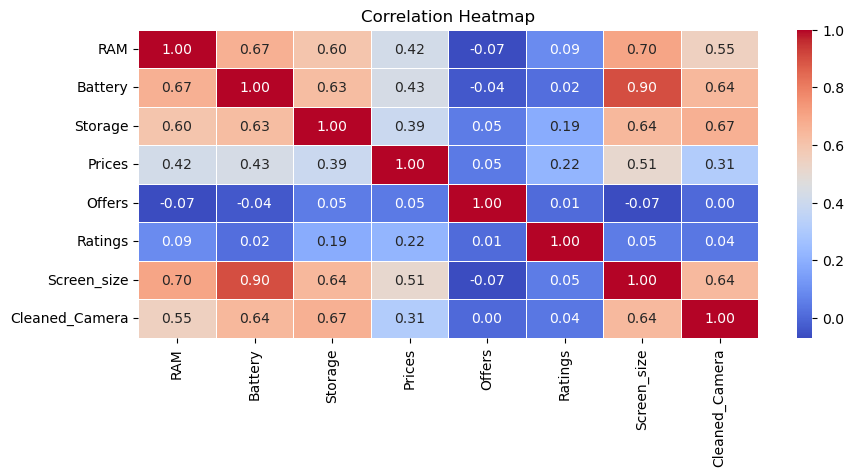

In [87]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [89]:
mean_prices_by_brand = df.groupby('Brand')['Prices'].mean()
mean_prices_by_brand

Brand
Amaq           1500.000000
Apple         74749.863636
Blackzone      1500.000000
Cellecor       1500.000000
Dizo           1500.000000
Gfive          1500.000000
Globalone      1500.000000
Google        51750.000000
Honor         39999.000000
I              1500.000000
Iair           1500.000000
Infinix       40520.666667
Iqoo          24135.909091
Itel           7513.774194
Jio            1500.000000
Karbonn        2607.846154
Kechaoda       1500.000000
Lava          13813.470588
Lvix           1500.000000
Micromax       2374.916667
Motorola      30153.448276
Mtr            1500.000000
Nokia          2790.232558
Nothing       35071.142857
Oneplus       35633.083333
Oppo          23290.666667
Poco          26263.176471
Realme        20944.104478
Redmi         25734.137931
Samsung       27301.393443
Saregama       1500.000000
Siavantage     1500.000000
Snexian        1500.000000
Tara           1500.000000
Tecno         38530.800000
Uismart        1500.000000
Vivo          24158.64

In [90]:
pivot_table_brand_storage = df.pivot_table(values='Prices', index='Brand', columns='Storage',aggfunc='mean')
pivot_table_brand_storage

Storage,0.0,2.0,3.0,4.0,16.0,32.0,64.0,125.0,128.0,256.0,512.0
Brand,,,,,,,,,,,
Amaq,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,NaN,NaN,NaN
Apple,NaN,NaN,NaN,NaN,NaN,NaN,49999.000000,NaN,75153.769231,81071.428571,NaN
Blackzone,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,NaN,NaN,NaN
Cellecor,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,NaN,NaN,NaN
Dizo,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,NaN,NaN,NaN
Gfive,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,NaN,NaN,NaN
Globalone,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,NaN,NaN,NaN
Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51166.666667,53500.000000,NaN
Honor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36665.666667,49999.0


In [91]:
df.groupby("Brand")["Battery"].mean()

Brand
Amaq          1000.000000
Apple         3241.272727
Blackzone     1100.000000
Cellecor      1000.000000
Dizo          1900.000000
Gfive         2000.000000
Globalone     1000.000000
Google        4404.000000
Honor         5400.000000
I             2125.000000
Iair          1733.333333
Infinix       5190.476190
Iqoo          5232.727273
Itel          2332.258065
Jio           1866.666667
Karbonn       1869.538462
Kechaoda      1225.000000
Lava          2480.117647
Lvix          1666.666667
Micromax      1683.333333
Motorola      4762.068966
Mtr           1000.000000
Nokia         1616.046512
Nothing       4914.285714
Oneplus       5237.500000
Oppo          5000.000000
Poco          5008.823529
Realme        5029.850746
Redmi         5044.827586
Samsung       4273.770492
Saregama      1350.000000
Siavantage    1000.000000
Snexian       1660.000000
Tara          1000.000000
Tecno         5200.000000
Uismart       1050.000000
Vivo          5092.000000
Vox           1000.000000
Xiaomi

In [92]:
brand_percentages = (df['Brand'].value_counts(normalize=True) * 100).round(2)
brand_percentages

Brand
Redmi         12.89
Realme         9.93
Itel           9.19
Samsung        9.04
Kechaoda       6.81
Nokia          6.37
Poco           5.04
Lava           5.04
Motorola       4.30
Vivo           3.70
Oneplus        3.56
Apple          3.26
Infinix        3.11
Tecno          2.22
Karbonn        1.93
Oppo           1.78
Micromax       1.78
Iqoo           1.63
Google         1.19
Nothing        1.04
Snexian        0.74
I              0.59
Honor          0.59
Lvix           0.44
Iair           0.44
Jio            0.44
Saregama       0.30
Tara           0.30
Uismart        0.30
Xiaomi         0.30
Mtr            0.30
Gfive          0.30
Blackzone      0.30
Siavantage     0.15
Globalone      0.15
Dizo           0.15
Cellecor       0.15
Vox            0.15
Amaq           0.15
Name: proportion, dtype: float64

<Axes: ylabel='count'>

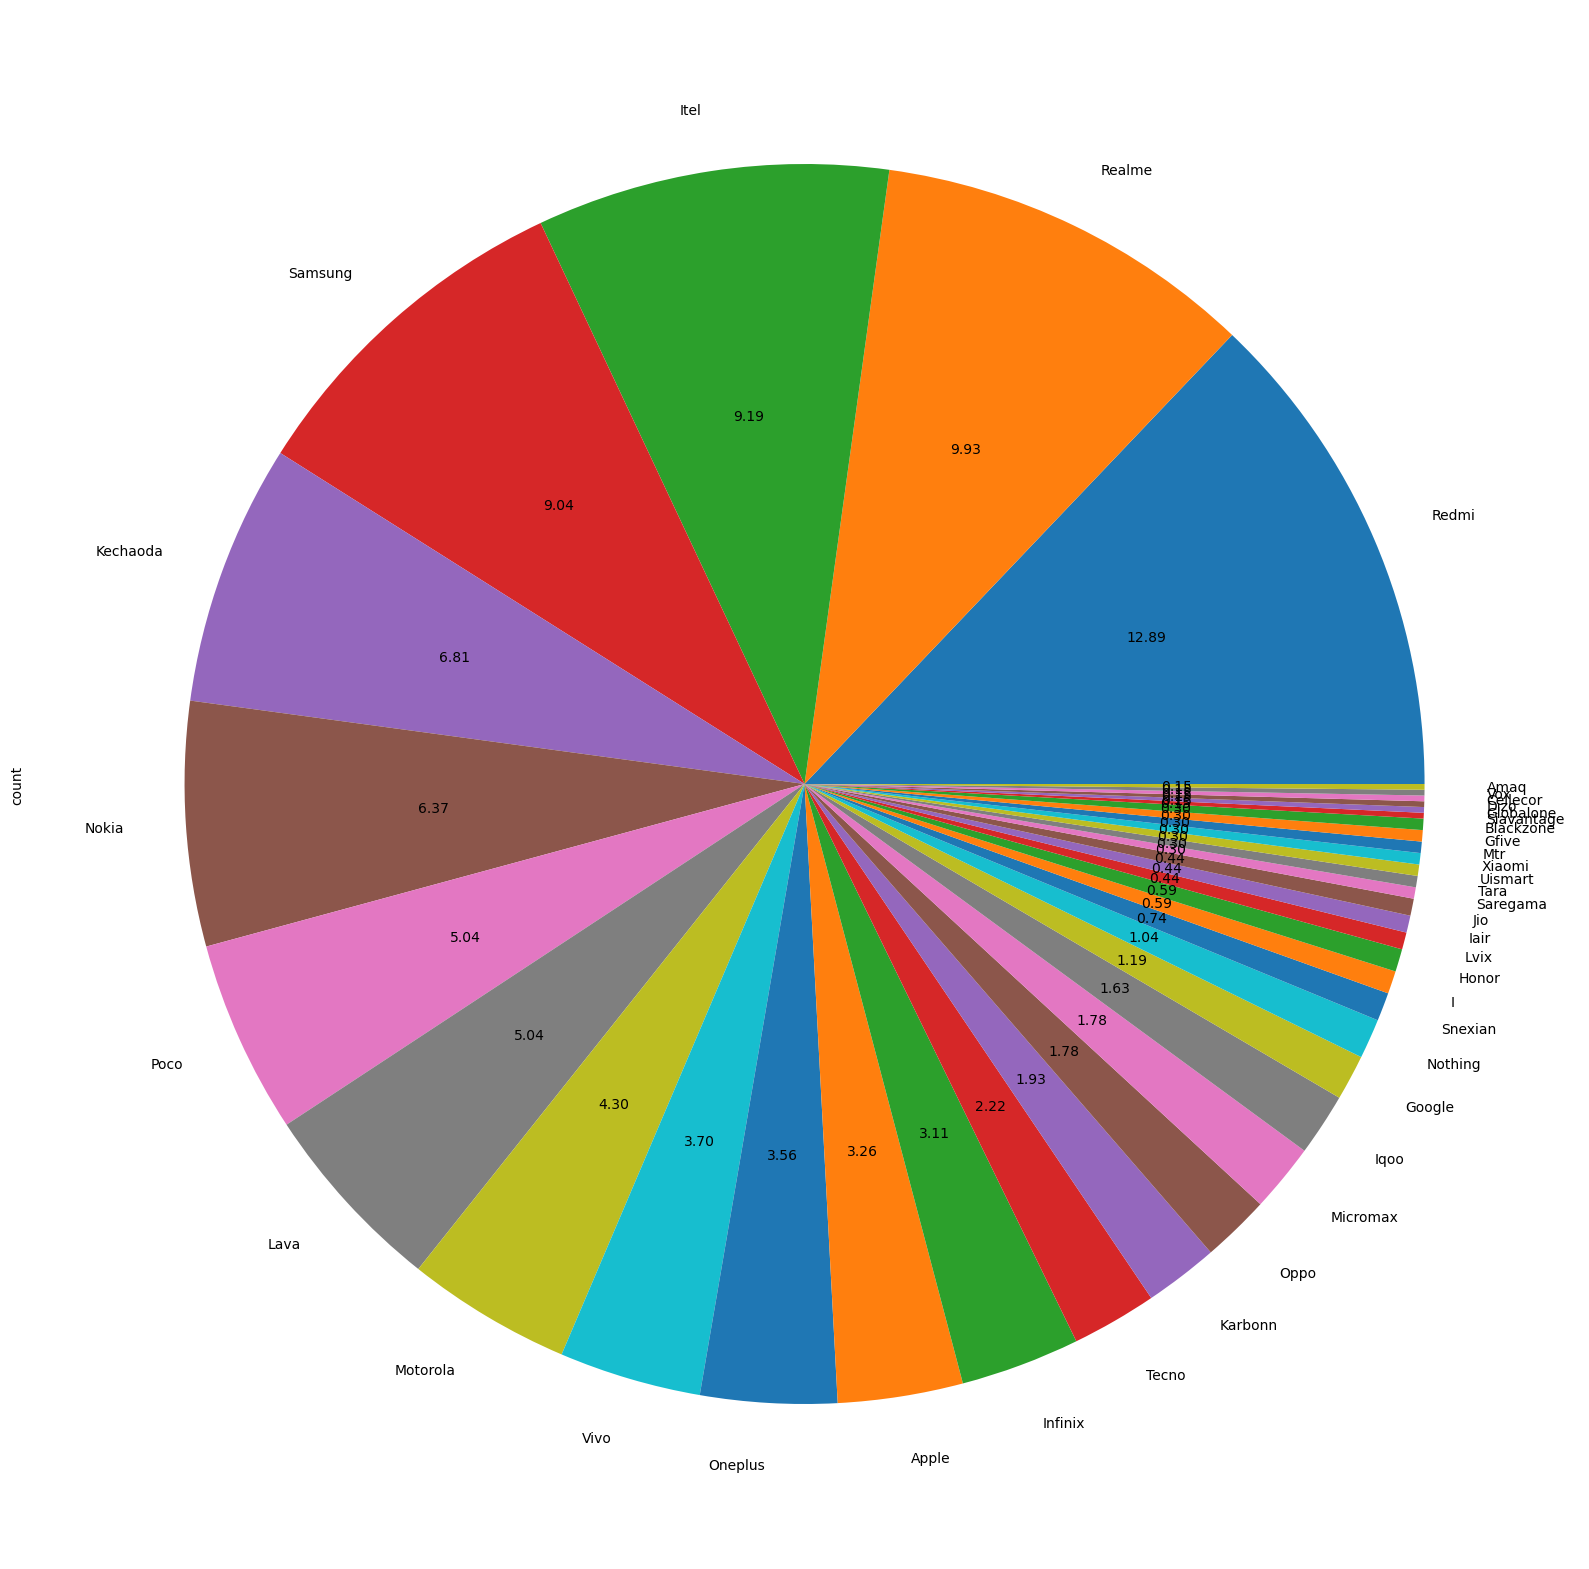

In [93]:
plt.figure(figsize = (20,25))
df["Brand"].value_counts().plot(kind = "pie",autopct = "%.2f")

### Conclusion, Recommendation, and Future Improvement¶

### Conclusion

#### What are the specification that affecting phone prices from our analysis using the correlation method and seaborn heatmap, the major specification that affecting the price range are

1.RAM Size the more expensive phone (higher price range) has a higher RAM size. From our analysis we found out that the higher the price range the higher the minimum ram size for phones

2.Battery Power for the battery power the min battery power of all phone price range are around 500 mAh, and the maximum battery power of all price range is around 5000 mAh. However the the average battery power keep increasing in general as the price range goes up.

3.Screen_Size the determinant factor when it comes to screen quality and in this case the height and the width play a role when it comes to determining a price of a phone range, for the pixel width it shows that phone that's in a higher price range has a higher Screen Size. however for the Screen Size the distribution kind of looks similar for phone in all price range

### Screen Size and Phone Price Range

1.in general the screen size for phone doesn't really much effect on the price range, the average screen size for phone in price range 10k - 20k are somewhere around 5.55 inches to 6.1 inches. however there's a somewhat of a jump in screensize when it comes to price range 30k, the average screensize for price range 50k is somewhere around 6.7 inches

2.HD Screen For phone that has HD quality screen the screen the trend of screen size kind of similar with the general trend the difference here is that HD Screen has a slightly lower screen size in average for price range 35k - 50k compared to the general population, and for the higher price range (price 1.7M ) HD Screen has a slightly higher average screen size (6.7 Inches) compared to the entire population.

3.Not HD Screen For non HD phone the screen size of a phone keep getting smaller as the phone price range goes up, the highest average screen size for non HD screen is in price range 1k-3k, at around (3.1) and the lowest average of screen size is in price range 3k (3.5) inches

### Camera Megapixel and Price Range

by looking at the table above we can see that for the primary camera (back camera) the average megapixel is somehow positively correlated with the price range , as the average megapixel get higher as the price range get more expensive.

### Recommendation

The main factor that's affecting phone price range is RAM SIZE so if a phone so if a smartphone company would like to create a phone in a specific price range, the RAM Size is one of the specification that needs to be watched carefully, since it's a feature that affecting the price range of a phone from this dataset

Second is battery power the more expensive the smartphone the higher the battery sizes it should have, since higher RAM needs more power from the battery, a smartphone company should adjust their battery battery accordingly, and what's all the RAM power if a phone could only last for a couple of hour

### Camera Megapixel

so for the phone company Primary Camera or back camera megapixel size should be more considerated compared to the front camera

### Screen Quality and Screen Size¶

this specification needs to be watched before a phone company launch a new product, The Screen size's need to be considered when lauching a new phone, NON HD screen should not have a big screen for phone in price range 30k because of the trend from our analysis, and the image quality will also get pixelated from having too big of a screen and too low of Screen Size(3.1)

For HD Screen as the phone company want to launch a phone in a higher price Screen size and the Screen height of a phone should be in a higher range (Price Range 35k) as well, and for the screen sizes phone with HD screen and high price range, the screen size's should be bigger than the screen size of lower price range